# Devoir 1

par

**Jonathan Larose**

**Augusto Dos Santos Lagté**

In [1]:
%pylab inline
import numpy as np
import pylab as py
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
#import utilitaires

# Load Data Iris
iris = np.loadtxt("iris.txt")

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Test python

b = np.empty((3,3))

b[:,0] = 1
b[:,1] = 2
b[:,2] = 3


t = np.array([1,2,3,4,6])

print 3-t

[ 2  1  0 -1 -3]


### Partie 3

In [3]:
# Estimateur de densité paramétrique Gausienne diagonale
class est_dst_gauss_diag:
    
    def __init__(self):
        self.n_dims = -1
        self.mu = None
        self.sigma_sq = None
    
    def train(self, train_data):
        self.n_dims = train_data.shape[1]
        self.mu = np.mean(train_data, axis=0)
        self.sigma_sq = numpy.sum((train_data - self.mu) ** 2.0, axis = 0) / train_data.shape[0]
    
    def compute_predictions(self, test_data):
        
        # On doit avoir entrainé des données
        if(self.n_dims == -1):
            print 'Aucun entrainement sur un ensemble de données n\'a été fait.'
            return
        
        # Determinant de la matrice (diagonale) de covariance est le produit de sa diagonale
        det_cov = np.prod(self.sigma_sq)
        # Calcul du dénominateur (normalisation)
        cnorm = -(self.n_dims / 2.0 * np.log(2*np.pi) + (np.log(det_cov) / 2.0))
        # Calcul des log de probabilité des data tests
        log_prob = cnorm - np.sum(((test_data - self.mu)**2.0) / self.sigma_sq / 2.0, axis=1)
        
        # Log --> prob
        prob = np.e**np.array(log_prob)
        
        return prob
    

In [4]:
# Estimateur de densité Parzen Gaussien Isométrique
def minkowski_mat(x,Y,p=2):
    return (numpy.sum((numpy.abs(x-Y))**p,axis=1))**(1.0/p)


class est_dst_parzen_n_gau_iso:

    def __init__(self):
        self.n_dims = -1
        self.train_data = None
        
    # Garder train_data comme une variable de la classe est_den_parzen_n_gau_iso
    def train(self, train_data):
        self.n_dims = train_data.shape[1]
        self.train_data = train_data        
        
    # Retourne un vecteur de taille nb. ex. de test contenant les log
    # probabilités de chaque exemple de test sous le modèle.    
    def compute_predictions(self, test_data, sigma=1):
        
        # On doit avoir entrainé des données
        if(self.n_dims == -1):
            print 'Aucun entrainement sur un ensemble de données n\'a été fait.'
            return
        
        self.sigma = sigma
        
        
        est_den = np.zeros((test_data.shape[0]))     
        
        """
        #c = (1/(((2*np.pi)**0.5)*self.sigma)**self.n_dims)
        c = -self.n_dims * np.log(2*np.pi)/2.0 - self.n_dims*np.log(self.sigma)
        
        # Pour chaque vecteur x dans test_data on va calcule l'estimation de la densité
        for i in range(test_data.shape[0]):
            somme = 0
            
            for j in range(self.train_data.shape[0]):
                # log(constante de normalisation)
                
                # il faut calculer la valeur de la log-probabilite de chaque exemple
                # de test sous le modele determine par mu et sigma_sq. le vecteur
                # des probabilites est/sera log_prob
                log_prob = c - np.sum((test_data[i] - self.train_data[j])**2.0) / (2.0 * self.sigma**2)
                
                
                #dist = minkowski_vec(test_data[i],self.train_data[j])
                dist = np.sum((test_data[i] -  self.train_data[j])**2.0)
                #somme += c*np.e**-(dist)/(2*self.sigma**2)
                somme += np.e**log_prob
                
            est_den[i] = somme/self.train_data.shape[0]
        """
        
        #test jo parz
        pred = np.zeros(test_data.shape[0])

        cnorm = -self.n_dims * ((np.log(2 * np.pi) / 2.0) + np.log(sigma))
        
        for i in range(test_data.shape[0]):
            log_gauss = cnorm - (minkowski_mat(test_data[i], self.train_data)**2.0 / (sigma**2)) / 2.0
            pred[i] = np.sum(np.e**log_gauss) / self.train_data.shape[0]
            
        
        #print pred
        #print est_den

        return pred
    
    

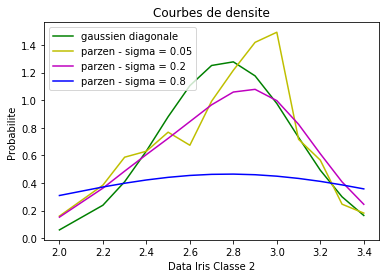

In [5]:
# Densité 1D

sub_c2_1d = iris[50:100,1:2]

# Modele densité gausienne diagonale
model_gauss = est_dst_gauss_diag()
model_gauss.train(sub_c2_1d)

# Modele de densité Parzen
model_parz = est_dst_parzen_n_gau_iso()
model_parz.train(sub_c2_1d)

sub_c2_1d = np.sort(sub_c2_1d, axis=0)

dst_gauss = model_gauss.compute_predictions(sub_c2_1d)
dst_parz1 = model_parz.compute_predictions(sub_c2_1d, 0.05) #sur-apprentissage
dst_parz2 = model_parz.compute_predictions(sub_c2_1d, 0.20) #sigma approprié
dst_parz3 = model_parz.compute_predictions(sub_c2_1d, 0.8)  #sous-apprentissage


# Graphique
x = sub_c2_1d

figure()
h1, = py.plot(x, dst_gauss, 'g')
h2, = py.plot(x, dst_parz1, 'y')
h3, = py.plot(x, dst_parz2, 'm')
h4, = py.plot(x, dst_parz3, 'b')
handles = [h1,h2,h3,h4]

xlabel('Data Iris Classe 2')
ylabel('Probabilite')
title('Courbes de densite')

#legende
labels = ['gaussien diagonale', 'parzen - sigma = 0.05','parzen - sigma = 0.2','parzen - sigma = 0.8']
py.legend(handles, labels)

show()

In [6]:
def gridcontour(pred, data):
    pass
    

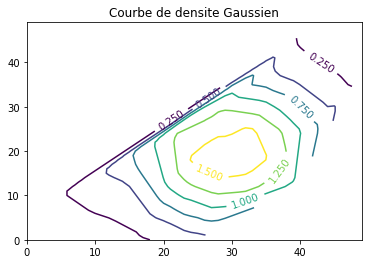

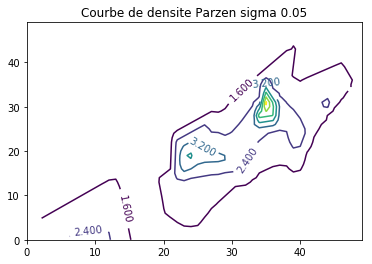

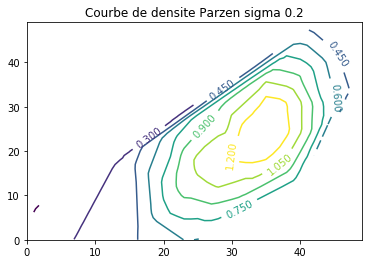

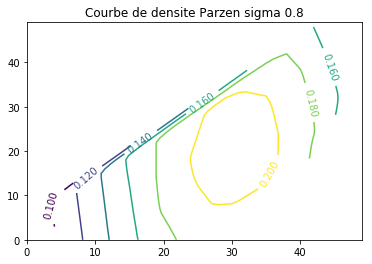

In [7]:
# Densité 2D
sub_c2 = iris[50:100,[2,3]]

# Modele densité gausienne diagonale
model_gauss = est_dst_gauss_diag()
model_gauss.train(sub_c2)

# Modele de densité Parzen
model_parz = est_dst_parzen_n_gau_iso()
model_parz.train(sub_c2)

dst_gauss = model_gauss.compute_predictions(sub_c2)
dst_parz1 = model_parz.compute_predictions(sub_c2, 0.05) #sur-apprentissage
dst_parz2 = model_parz.compute_predictions(sub_c2, 0.20) #sigma approprié
dst_parz3 = model_parz.compute_predictions(sub_c2, 0.8)  #sous-apprentissage

# Graphique Gaussien
gxmin = np.min(sub_c2[:,0])
gxmax = np.max(sub_c2[:,0])
gymin = np.min(sub_c2[:,1])
gymax = np.max(sub_c2[:,1])
xg = np.linspace(gxmin, gxmax, len(sub_c2[:,0]))
yg = np.linspace(gymin, gymax, len(sub_c2[:,1]))
Zg = mlab.griddata(sub_c2[:,0], sub_c2[:,1],dst_gauss, xg, yg, interp='linear')
CS = plt.contour(Zg)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Courbe de densite Gaussien')
plt.show()


# Graphe Parzen
p1xmin = np.min(sub_c2[:,0])
p1xmax = np.max(sub_c2[:,0])
p1ymin = np.min(sub_c2[:,1])
p1ymax = np.max(sub_c2[:,1])
xp1 = np.linspace(p1xmin, p1xmax, len(sub_c2[:,0]))
yp1 = np.linspace(p1ymin, p1ymax, len(sub_c2[:,1]))
Zp1 = mlab.griddata(sub_c2[:,0], sub_c2[:,1],dst_parz1, xp1, yp1, interp='linear')
CS = plt.contour(Zp1)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Courbe de densite Parzen sigma 0.05')
plt.show()

p2xmin = np.min(sub_c2[:,0])
p2xmax = np.max(sub_c2[:,0])
p2ymin = np.min(sub_c2[:,1])
p2ymax = np.max(sub_c2[:,1])
xp2 = np.linspace(p2xmin, p2xmax, len(sub_c2[:,0]))
yp2 = np.linspace(p2ymin, p2ymax, len(sub_c2[:,1]))
Zp2 = mlab.griddata(sub_c2[:,0], sub_c2[:,1],dst_parz2, xp2, yp2, interp='linear')
CS = plt.contour(Zp2)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Courbe de densite Parzen sigma 0.2')
plt.show()

p3xmin = np.min(sub_c2[:,0])
p3xmax = np.max(sub_c2[:,0])
p3ymin = np.min(sub_c2[:,1])
p3ymax = np.max(sub_c2[:,1])
xp3 = np.linspace(p3xmin, p3xmax, len(sub_c2[:,0]))
yp3 = np.linspace(p3ymin, p3ymax, len(sub_c2[:,1]))
Zp3 = mlab.griddata(sub_c2[:,0], sub_c2[:,1],dst_parz3, xp3, yp3, interp='linear')
CS = plt.contour(Zp3)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Courbe de densite Parzen sigma 0.8')
plt.show()

## Partie 4

In [8]:
# Classificateur de Bayes

class classifieur_bayes:
    
    def __init__(self, modeles_mv, priors=None, sigma=1.):
        self.modeles_mv = modeles_mv
        self.n_classe = len(modeles_mv)
        self.sigma = sigma
        
        # Si des priors sont entré ou pas
        if(priors):
            if len(priors) != len(modeles_mv):
                print 'Il doit y avoir autant de priors que de modeles gaussien'
            self.priors = priors
        else:
            # Si aucun priors n'est fourni,
            # on assume que les classes sont répartie également
            self.priors = np.ones(self.n_classe) / self.n_classe
            
    
    def compute_predictions(self, test_data):
        
        pred = np.empty((test_data.shape[0], self.n_classe))
        
        # Calcul en fonction de l'estimateur utilisé (parzen utilise le sigma)
        # Estimateur de densité Gaussienne diagonale
        if(isinstance(self.modeles_mv[0], est_dst_gauss_diag)):
            #print "Classifieur basé sur estimateur de densité Gaussienne diagonale"
            for i in range(self.n_classe):
                pred[:,i] = self.modeles_mv[i].compute_predictions(test_data) * self.priors[i]
                
        # Estimateur de densité Parzen
        elif(isinstance(self.modeles_mv[0], est_dst_parzen_n_gau_iso)):
            #print "Classifieur basé sur estimateur de densité Parzen"
            for i in range(self.n_classe):
                pred[:,i] = self.modeles_mv[i].compute_predictions(test_data, self.sigma) * self.priors[i]
        
        
        # prediction de la classe en fonction de la densité de chaque point
        classe_pred = np.argmax(pred, axis=1) + 1
        
        return classe_pred



In [9]:
# Gridplot des démos légèrement modifié

def gridplot(classifieur,train,test,n_points=50, titre=''):

    train_test = np.vstack((train,test))
    (min_x1,max_x1) = (min(train_test[:,0]),max(train_test[:,0]))
    (min_x2,max_x2) = (min(train_test[:,1]),max(train_test[:,1]))

    xgrid = np.linspace(min_x1,max_x1,num=n_points)
    ygrid = np.linspace(min_x2,max_x2,num=n_points)

	# calcule le produit cartesien entre deux listes
    # et met les resultats dans un array
    thegrid = np.array(combine(xgrid,ygrid))

    # Notre Classifieur retourne directement les prédictions
    classesPred = classifieur.compute_predictions(thegrid)

    # La grille
    # Pour que la grille soit plus jolie
    props = dict( alpha=0.3, edgecolors='none' )
    pylab.scatter(thegrid[:,0],thegrid[:,1],c = classesPred, s=50, edgecolors='none', alpha=0.1)
    pylab.pcolormesh(xgrid, ygrid, classesPred.reshape((n_points, n_points)).T, alpha=.3)
    
	# Les points d'entrainment
    pylab.scatter(train[:,0], train[:,1], c = train[:,-1], marker = 'v', s=150)
    # Les points de test
    pylab.scatter(test[:,0], test[:,1], c = test[:,-1], marker = 's', s=150)

    ## Un petit hack, parce que la fonctionalite manque a pylab...
    h1, = pylab.plot([min_x1], [min_x2], marker='o', c = 'w',ms=5) 
    h2, = pylab.plot([min_x1], [min_x2], marker='v', c = 'w',ms=5) 
    h3, = pylab.plot([min_x1], [min_x2], marker='s', c = 'w',ms=5) 
    handles = [h1,h2,h3]
    ## fin du hack

    labels = ['grille','train','test']
    pylab.legend(handles,labels)
    
    xlabel('trait 1')
    ylabel('trait 2')
    title(titre)
    
    #py.colorbar()

    pylab.axis()
    pylab.show()
    
## http://code.activestate.com/recipes/302478/
def combine(*seqin):
    '''returns a list of all combinations of argument sequences.
for example: combine((1,2),(3,4)) returns
[[1, 3], [1, 4], [2, 3], [2, 4]]'''
    def rloop(seqin,listout,comb):
        '''recursive looping function'''
        if seqin:                       # any more sequences to process?
            for item in seqin[0]:
                newcomb=comb+[item]     # add next item to current comb
                # call rloop w/ rem seqs, newcomb
                rloop(seqin[1:],listout,newcomb)
        else:                           # processing last sequence
            listout.append(comb)        # comb finished, add to list
    listout=[]                      # listout initialization
    rloop(seqin,listout,[])         # start recursive process
    return listout

matplotlib.__version__   

'2.0.2'

In [10]:
# 1. Preparation des ensembles Iris

index_c1 = range(50)
index_c2 = range(50,100)
index_c3 = range(100,150)
index = range(150)

np.random.seed(123)
np.random.shuffle(index)

# Données d'entraînement
train_c1 = iris[index_c1,:-1]
train_c2 = iris[index_c2,:-1]
train_c3 = iris[index_c3,:-1]

train_index = index[:100]
valid_index = index[100:]

train_set = iris[train_index,:]
train_data = train_set[:,:-1]
train_label = train_set[:,-1]

valid_set = iris[valid_index,:]
valid_data = valid_set[:,:-1]
valid_label = valid_set[:,-1]


Classification en utilisant les traits 1 et 2 :


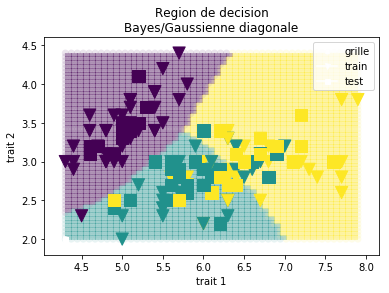

Taux d'erreur sur l'ensemble d'entraînement :  23.0 %
Taux d'erreur sur l'ensemble de validation :  20.0 %

Classification en utilisant tous les traits :

Taux d'erreur sur l'ensemble d'entraînement :  4.0 %
Taux d'erreur sur l'ensemble de validation :  4.0 %


In [11]:
# 2. Classification basé sur les densités paramétriques Gaussienne diagonales

# Pour la visualisation 2D
# colonne d'entrainement
train_cols = [0,1]

train_c1_2d = train_c1[:,train_cols]
train_c2_2d = train_c2[:,train_cols]
train_c3_2d = train_c3[:,train_cols]

train_data_2d = train_set[:,train_cols]
valid_data_2d = valid_set[:,train_cols]

# Entrainement sur 2 traits caractéristiques
# modeles par classe
gauss_c1 = est_dst_gauss_diag()
gauss_c2 = est_dst_gauss_diag()
gauss_c3 = est_dst_gauss_diag()

gauss_c1.train(train_c1_2d)
gauss_c2.train(train_c2_2d)
gauss_c3.train(train_c3_2d)

modeles_gauss = [gauss_c1, gauss_c2, gauss_c3]

classifieur = classifieur_bayes(modeles_gauss)

valid_pred = classifieur.compute_predictions(valid_data_2d)

print "Classification en utilisant les traits", train_cols[0]+1,"et", train_cols[1]+1, ":"

# Graphique
gridplot(classifieur,
         train_set[:,train_cols + [-1]],
         valid_set[:,train_cols + [-1]],
         n_points=50,
         titre = "Region de decision\nBayes/Gaussienne diagonale")


# Taux d'erreur sur les 2 premiers traits caractéristique
train_pred = classifieur.compute_predictions(train_data_2d)

print "Taux d'erreur sur l'ensemble d'entraînement : ", (1-np.mean(train_pred == train_label)) * 100, "%"
print "Taux d'erreur sur l'ensemble de validation : ", (1-np.mean(valid_pred == valid_label)) * 100, "%"


# Entraînement sur tous les traits caractéristiques
gauss_c1.train(train_c1)
gauss_c2.train(train_c2)
gauss_c3.train(train_c3)

modeles_gauss = [gauss_c1, gauss_c2, gauss_c3]

classifieur = classifieur_bayes(modeles_gauss)

print "\nClassification en utilisant tous les traits :\n"

train_pred = classifieur.compute_predictions(train_data)
valid_pred = classifieur.compute_predictions(valid_data)

print "Taux d'erreur sur l'ensemble d'entraînement : ", (1-np.mean(train_pred == train_label)) * 100, "%"
print "Taux d'erreur sur l'ensemble de validation : ", (1-np.mean(valid_pred == valid_label)) * 100, "%"

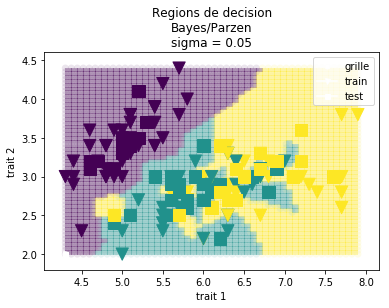

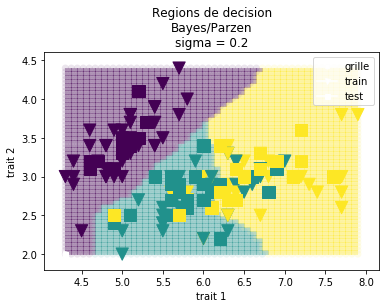

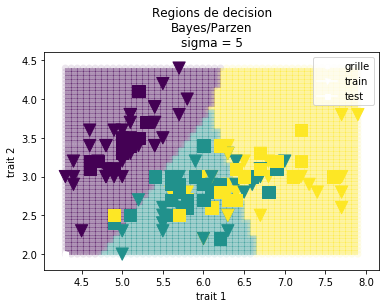

In [12]:
# 3. Classifieur de Bayes basé sur les densités de Parzen à noyeau isotropique

# Pour la visualisation 2D
# colonne d'entrainement
train_cols = [0,1]

train_c1_2d = train_c1[:,train_cols]
train_c2_2d = train_c2[:,train_cols]
train_c3_2d = train_c3[:,train_cols]

train_data_2d = train_set[:,train_cols]
valid_data_2d = valid_set[:,train_cols]

# Estimateurs de densité Parzen
parz_c1 = est_dst_parzen_n_gau_iso()
parz_c2 = est_dst_parzen_n_gau_iso()
parz_c3 = est_dst_parzen_n_gau_iso()

# Entraînés sur les ensembles d'entraînement 2D
parz_c1.train(train_c1_2d)
parz_c2.train(train_c2_2d)
parz_c3.train(train_c3_2d)

modeles_parz = [parz_c1,parz_c2,parz_c3]

# Les classifications
sigma_petit = 0.05
sigma_ok = 0.2
sigma_grand = 5

classifieur_1 = classifieur_bayes(modeles_parz, sigma=sigma_petit) # sigma trop petit
classifieur_2 = classifieur_bayes(modeles_parz, sigma=sigma_ok)  # sigma trop OK
classifieur_3 = classifieur_bayes(modeles_parz, sigma=sigma_grand)  # sigma trop grand

# Graphiques
gridplot(classifieur_1,
         train_set[:,train_cols + [-1]],
         valid_set[:,train_cols + [-1]],
         n_points=50,
         titre = "Regions de decision\nBayes/Parzen\nsigma = " + str(sigma_petit))

gridplot(classifieur_2,
         train_set[:,train_cols + [-1]],
         valid_set[:,train_cols + [-1]],
         n_points=50,
         titre = "Regions de decision\nBayes/Parzen\nsigma = " + str(sigma_ok))

gridplot(classifieur_3,
         train_set[:,train_cols + [-1]],
         valid_set[:,train_cols + [-1]],
         n_points=50,
         titre = "Regions de decision\nBayes/Parzen\nsigma = " + str(sigma_grand))


La meilleur valeur de sigma pour l'estimateur de densité Parzen sur les 2 premiers traits est :  0.1


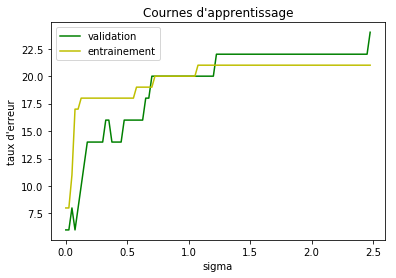

Le meilleur taux d'erreur sur l'ensemble de validation est :  6.0 %


In [13]:
# Trouver le meilleur sigma pour l'estimateur de densité de Parzen (2 traits)

# Pour la visualisation 2D
# colonne d'entrainement
train_cols = [0,1]

train_c1_2d = train_c1[:,train_cols]
train_c2_2d = train_c2[:,train_cols]
train_c3_2d = train_c3[:,train_cols]

train_data_2d = train_set[:,train_cols]
valid_data_2d = valid_set[:,train_cols]

# Estimateurs de densité Parzen
parz_c1 = est_dst_parzen_n_gau_iso()
parz_c2 = est_dst_parzen_n_gau_iso()
parz_c3 = est_dst_parzen_n_gau_iso()

# Entraînés sur les ensembles d'entraînement 2D
parz_c1.train(train_c1_2d)
parz_c2.train(train_c2_2d)
parz_c3.train(train_c3_2d)

modeles_parz = [parz_c1,parz_c2,parz_c3]

sigma_best = 0
erreur_min = 100.
erreur_entrainement = np.zeros([100])+1000
erreur_validation = np.zeros([100])+1000

scale_sigma = 40.

for i in range(100):
    sigma = (i+1)/scale_sigma
    
    # classification
    c = classifieur_bayes(modeles_parz, sigma=sigma)
    t_pred = c.compute_predictions(train_data_2d)
    v_pred = c.compute_predictions(valid_data_2d)
    
    # taux d'erreur
    erreur_entrainement[i] = (1-np.mean(t_pred == train_label)) * 100
    erreur_validation[i] = (1-np.mean(v_pred == valid_label)) * 100
    
    if(erreur_validation[i] <= erreur_min):
        erreur_min = erreur_validation[i]
        sigma_best = sigma
        

print "La meilleur valeur de sigma pour l'estimateur de densité Parzen sur les 2 premiers traits est : ", sigma_best

# Graphique
x = np.arange(100)/scale_sigma

figure()
h1, = py.plot(x, erreur_validation, 'g')
h2, = py.plot(x, erreur_entrainement, 'y')
handles = [h1,h2]

xlabel('sigma')
ylabel("taux d'erreur")
title("Cournes d'apprentissage")

#legende
labels = ['validation', 'entrainement']
py.legend(handles, labels)

show()

print "Le meilleur taux d'erreur sur l'ensemble de validation est : ", np.min(erreur_validation), "%"

La meilleur valeur de sigma pour l'estimateur de densité Parzen sur les 4 traits est :  0.175


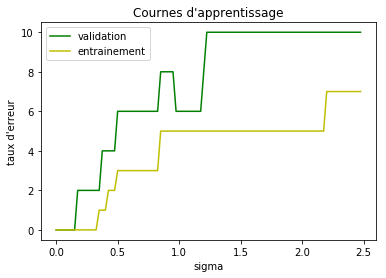

Le meilleur taux d'erreur sur l'ensemble de validation est :  0.0 %


In [14]:
# Trouver le meilleur sigma pour l'estimateur de densité de Parzen (4 traits)

# Entraînés sur les ensembles d'entraînement 4D
parz_c1.train(train_c1)
parz_c2.train(train_c2)
parz_c3.train(train_c3)

modeles_parz = [parz_c1,parz_c2,parz_c3]


sigma_best = 0
erreur_min = 100.
erreur_entrainement = np.zeros([100])+1000
erreur_validation = np.zeros([100])+1000

for i in range(100):
    sigma = (i+1)/scale_sigma
    
    # classification
    c = classifieur_bayes(modeles_parz, sigma=sigma)
    t_pred = c.compute_predictions(train_data)
    v_pred = c.compute_predictions(valid_data)
    
    # taux d'erreur
    erreur_entrainement[i] = (1-np.mean(t_pred == train_label)) * 100
    erreur_validation[i] = (1-np.mean(v_pred == valid_label)) * 100
    
    if(erreur_validation[i] <= erreur_min):
        erreur_min = erreur_validation[i]
        sigma_best = sigma
        
        
print "La meilleur valeur de sigma pour l'estimateur de densité Parzen sur les 4 traits est : ", sigma_best

# Graphique
x = np.arange(100)/scale_sigma

figure()
h1, = py.plot(x, erreur_validation, 'g')
h2, = py.plot(x, erreur_entrainement, 'y')
handles = [h1,h2]

xlabel('sigma')
ylabel("taux d'erreur")
title("Cournes d'apprentissage")

#legende
labels = ['validation', 'entrainement']
py.legend(handles, labels)

show()

print "Le meilleur taux d'erreur sur l'ensemble de validation est : ", np.min(erreur_validation), "%"

4 - D'après ces expériences...